
# Machine Learning with Python

Welcome to the **Machine Learning** course! This course is designed to give you hands-on experience with the foundational concepts and advanced techniques in machine learning. You will explore:

1. **Supervised Learning**
    - Regression algorithms
    - Classification algorithms
2. **Unsupervised Learning**
    - Clustering algorithms
    - Dimensionality reduction
3. **Fairness and Interpretability**
    - Interpretable methods
    - Bias evaluation
    
Throughout the course, you'll engage in projects to solidify your understanding and gain practical skills in implementing machine learning algorithms.  

Instructor: Dr. Adrien Dorise  
Contact: adrien.dorise@hotmail.com  

---


## Part2.1: Unsupervised learning - Clustering on synthetic datasets
In this project, you will analyse clustering mehtods on synthetic data. The taks will include:  

1. **Import and Understand the Datasets**: Learn how to load, preprocess, and explore a dataset to prepare it for training.
2. **Train a clustering model**: Select and train a clustering model using scikit-learn.
3. **Evaluate and plot the model performance**: Select a criterion to which you can evaluate the model, and plot its result.
4. **Compare multiple clustering model, and get the best performance**: Compare multiple models on multiple datasets, and find the best model to fit the data.

In this exercise, some additional scripts are given to you:
- **evaluation.py** regroups the clustering evaluation methods seen in the course section. You will be able to call this script to analyse the performance of your clustering model.
- **distance.py** computes the euclidean distance necessary in the evaluation funcitons.

By the end of this project, you'll have a solid understanding of the different clustering methods.

---

## Dataset

This exercise will use the **Clustering Dataset repository** of the Dr. Milaan Parmar (https://github.com/milaan9/Clustering-Datasets).  
This repository contains the collection of UCI (real-life) datasets and Synthetic (artificial) datasets(with cluster labels).
  
Here, the collection of available synthetic datasets are given to you in the   
`part2_unsupervised_learning/1_clustering/dataset`  


You will have to select a couple of datasets of your liking, and try your best to find the optimal clustering.  
Here is a snapshots of the available datasets:  

<img src="dataset/plot/dataset_plot.png" alt="clustering_datasets" width="1500"/>  

The code snippet below allows you to load the selected dataset.

In [219]:
from scipy.io import arff

def get_dataset(path):
    """Import an .arff data file into a Python variable.
    Note that if the dataset contains more than 2 features, only the first two are exported.

    Args:
        path (string): Path to the .arff file

    Returns:
        data (list of [float, float]): Imported dataset
    """
    data = arff.loadarff(open(path,'r'))
    data = [[float(x[0]),float(x[1])] for x in data[0]]
    return data

## Data visualisation and preparation

**Your job**:
- Select a dataset from the list.
- Use the get_dataset() method to import it.
- Normalise the dataset between [0, 1].
- Plot the dataset using matplotlib plt.scatter method.

In [220]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import numpy as np
    
from evaluation import silhouette_score, calinski_harabasz_score

In [221]:
def charge_data(data):
    return get_dataset(f"/Users/aminechabane/Desktop/maching learning reponse/part2_unsupervised_learning/1_clustering/dataset/benchmark_artificial/{data}")

def Normalize(data):
    scaler =MinMaxScaler()
    return scaler.fit_transform(data)

def visualise_data(normalized_data):
    plt.figure(figsize=(8,6))
    plt.scatter(normalized_data[:,0],normalized_data[:,1],color="pink",s=50)
    plt.title("Affichage du Dataset")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.grid(True)
    plt.show()
    
    
    
def visualise_cluster(model,data,labels):
    print(f"visualisation pour model {model}")
    scatter = plt.scatter(data[:,0], data[:,1], c=labels, cmap="tab10", s=50)

    for label in np.unique(labels):
        plt.scatter([], [], color=scatter.cmap(scatter.norm(label)), label=f'Cluster {label}')

    plt.title("Visualisation des clusters (KMeans)")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.grid(True)
    plt.show()
    
from evaluation import silhouette_score, calinski_harabasz_score

def score(model,data,labels):
    print(f"=={model}==")
    print("Silhouette Score:", silhouette_score(data, labels))
    print("Calinski-Harabasz Index:", calinski_harabasz_score(data, labels))

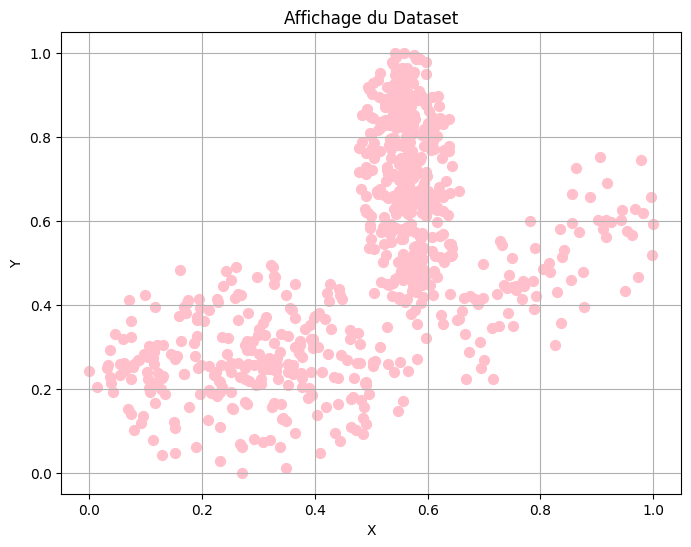

In [222]:
# Select a dataset from the list.
my_data = get_dataset("/Users/aminechabane/Desktop/maching learning reponse/part2_unsupervised_learning/1_clustering/dataset/benchmark_artificial/2d-3c-no123.arff")

# Normaliser les données entre [0,1]
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(my_data)
visualise_data(normalized_data)


## Create the cluster model

**Your job**:
- Train a model using the sklearn library (https://scikit-learn.org/stable/modules/clustering.html):
    - Select **two** algorithms that we studied in the course.
    - Evaluate the optimal number of clusters if required.
    - Train the algorithms on the dataset.
    
- Print the prediction on the first 10 samples for the two models alongside the target value.

In [223]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np
import pandas as pd

##### Model K-mean

In [224]:
def number_of_cluster(data):
    score_sil = []
    plage_cluster =range(2,10)
    for n in plage_cluster:
        km = KMeans(n_clusters=n,random_state=0)
        labels = km.fit_predict(data)
        score_sil.append(silhouette_score(data,labels))
    
    optimal_k = plage_cluster[np.argmax(score_sil)]
    return optimal_k
        

In [225]:
def kmean_model(data):
    n = number_of_cluster(data)
    k_mean = KMeans(n_clusters=n,random_state=0)
    k_mean.fit(data)

    # Prediction
    kmeans_labels = k_mean.labels_
    centroides = k_mean.cluster_centers_

    print("le nombre de cluster utiliser est :",n)
    return (kmeans_labels,centroides)
    

In [226]:
n = number_of_cluster(normalized_data)
k_mean = KMeans(n_clusters=n,random_state=0)
k_mean.fit(normalized_data)

# Prediction
kmeans_labels = k_mean.labels_
centroides = k_mean.cluster_centers_

print("le nombre de cluster utiliser est :",n)
print("Labels :", kmeans_labels)
print("Centres :", centroides)

le nombre de cluster utiliser est : 2
Labels : [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

##### DBSCAN

In [227]:
dbscan = DBSCAN(eps=0.06,min_samples=2)
dbscan_labels = dbscan.fit_predict(normalized_data)



In [228]:
df = pd.DataFrame({

    'KMeans Cluster': kmeans_labels[:10],
    'DBSCAN Cluster': dbscan_labels[:10]
})
df

,KMeans Cluster,DBSCAN Cluster
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
5,1,0
6,1,0
7,1,0
8,1,0
9,1,0


## Evaluating the clustering using evaluation metrics

As seen during the course, evaluating the partidionning can be quite complex, as no groud truth is available.  
In some cases, you can plot the clusters and verify it manually. Unfortunately, it is often impossible to rely on visualition for higher-dimensional systems.  
We will first analyse the clusters using the metrics seen in the course. These metrics are implemented in the **evaluation.py** script.

**Your job**:
- Using **evaluation.py** methods:
    - Select at least two metrics.
    - Evaluate your clustering on these two metrics.
    - Compare and conclude about the performance of the models.
    - Conclude on the performance for both models.

In [238]:
# Kmeans score
score("KMEANS",normalized_data,kmeans_labels)
# DBSCAN score
score("DBSCAN",normalized_data,dbscan_labels)

==KMEANS==
Silhouette Score: 0.5562237316682876
Calinski-Harabasz Index: 1199.7685518742558
==DBSCAN==
Silhouette Score: -0.14269083922830475
Calinski-Harabasz Index: 2.4393296549906465


## Evaluating the clustering using visualisation

Because we are working with 2D datasets, we have the opportunity to visualise the clustering.  
Plot the clusters, so you can confirm if your previous conclusion is correct.

**Your job**:
- Using matplotlib scatter method:
    - Plot the samples by coloring them regarding to their cluster ID.
    - You can use either a for loop, or the predicted labels to do so.
    - `fig = plt.scatter(f0, f1, c=labels)`
    - Don't forget to add a legend!

visualisation pour model KMeans


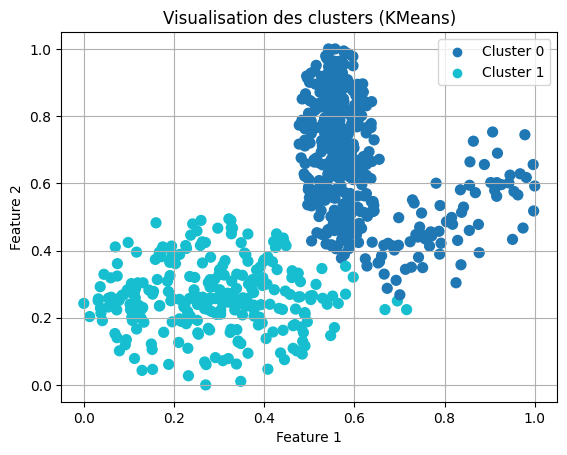

In [239]:
import matplotlib.pyplot as plt

# KMEANS cluster:
visualise_cluster("KMeans",normalized_data,kmeans_labels)


visualisation pour model DBSCAN


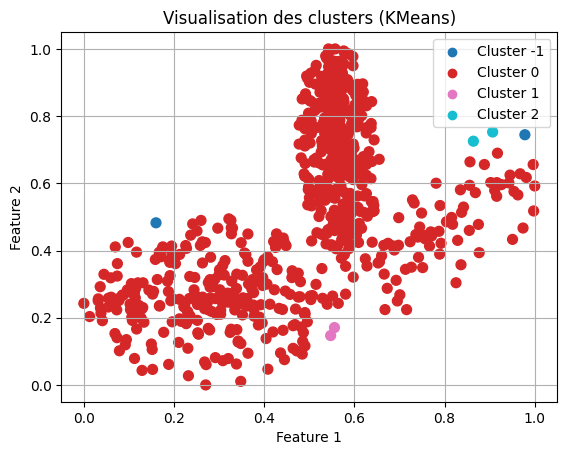

In [240]:
# DBSCAN clusters
visualise_cluster("DBSCAN",normalized_data,dbscan_labels)


## Try different datasets

Now that you have a good understanding of the clustering workload, let's try with different datasets!

**Your job**
- Select at least two more datasets.
- Train a DBSCAN and K-Means algorithm on it.
- Evaluate the performance using at least two metrics.
- Plot the clusters.
- Modifies your models hyperparameters to see their impacts on the results.
- Conclude on the advantage/disadvanges of K-Means over DBSCAN.

#### dataset 2:


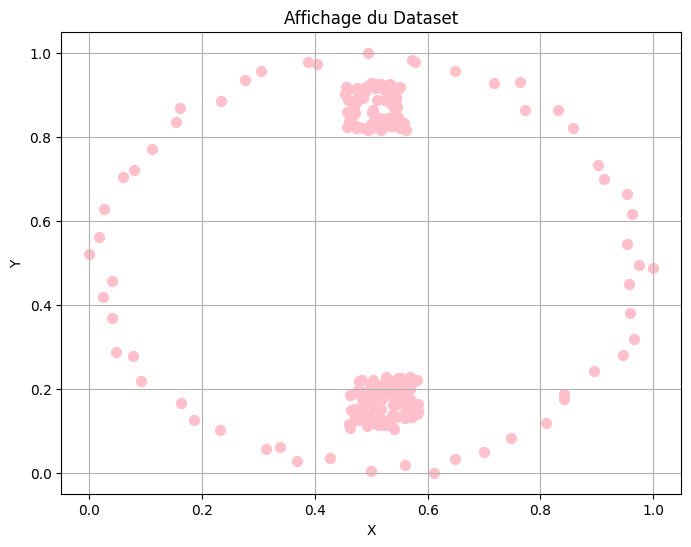

le nombre de cluster utiliser est : 4


In [232]:
# Dataset 2 :
my_data_2 = charge_data("zelnik6.arff")
normalize_data_2 = Normalize(my_data_2)
visualise_data(normalize_data_2)
kmeans_labels2=kmean_model(normalize_data_2)[0]

dbscan = DBSCAN(eps=0.06,min_samples=2)
dbscan_labels2 = dbscan.fit_predict(normalize_data_2)

In [233]:
def visualise_cluster(model,data,labels):
    print(f"visualisation pour model {model}")
    scatter = plt.scatter(data[:,0], data[:,1], c=labels, cmap="tab10", s=50)

    for label in np.unique(labels):
        plt.scatter([], [], color=scatter.cmap(scatter.norm(label)), label=f'Cluster {label}')

    plt.title("Visualisation des clusters (KMeans)")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.grid(True)
    plt.show()
    
    

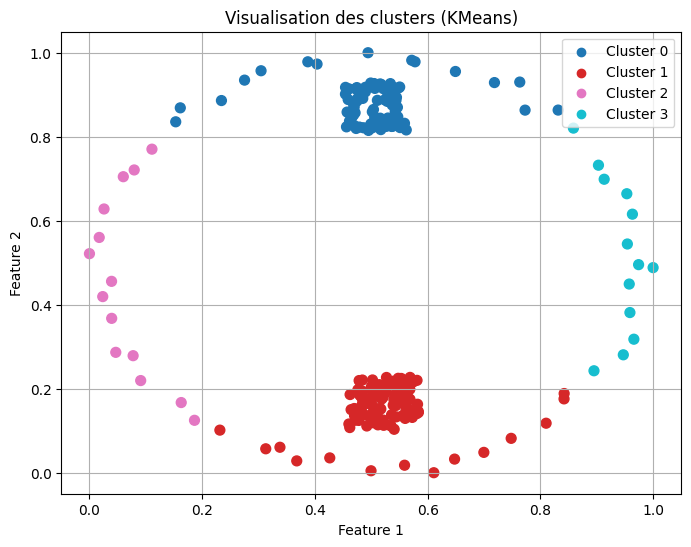

In [234]:

plt.figure(figsize=(8,6))
scatter = plt.scatter(normalize_data_2[:,0], normalize_data_2[:,1], c=kmeans_labels2, cmap="tab10", s=50)

for label in np.unique(kmeans_labels2):
    plt.scatter([], [], color=scatter.cmap(scatter.norm(label)), label=f'Cluster {label}')

plt.title("Visualisation des clusters (KMeans)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()


In [235]:
score("KMeans",normalize_data_2,kmeans_labels2)
score("DBSCAN",normalize_data_2,dbscan_labels2)

==KMeans==
Silhouette Score: 0.7597601154531146
Calinski-Harabasz Index: 829.4859793648985
==DBSCAN==
Silhouette Score: 0.5159944838810313
Calinski-Harabasz Index: 144.9424187275033


# Dataset 3:

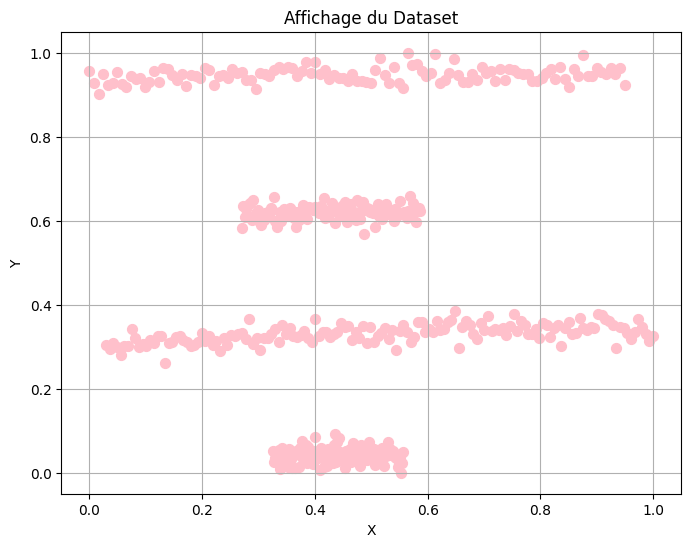

le nombre de cluster utiliser est : 6


In [236]:
my_data_3 = charge_data("zelnik5.arff")
normalize_data_3 = Normalize(my_data_3)
visualise_data(normalize_data_3)
kmeans_labels3 = kmean_model(normalize_data_3)[0]

dbscan = DBSCAN(eps=0.06,min_samples=2)
dbscan_labels3 = dbscan.fit_predict(normalize_data_3)

visualisation pour model KMeans


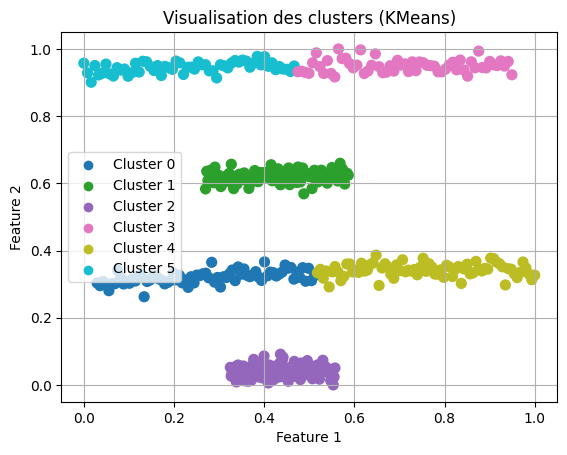

visualisation pour model DBSCAN


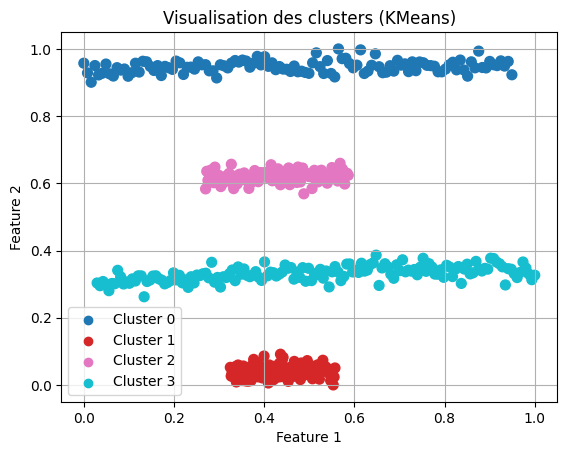

In [237]:
visualise_cluster("KMeans",normalize_data_3,kmeans_labels3)
visualise_cluster("DBSCAN",normalize_data_3,dbscan_labels3)
